In [1]:
!pip install -q openai arxiv pandas matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 1.0.2 requires pyee<9.0.0,>=8.1.0, but you have pyee 9.0.4 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [16]:
!pip install langgraph

     -------------------------------------- 148.2/148.2 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 434.1/434.1 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 47.3/47.3 kB 124.9 kB/s eta 0:00:00
     ------------------------------------- 358.8/358.8 kB 10.9 MB/s eta 0:00:00
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
     -------------------------------------- 125.1/125.1 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 133.8/133.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 54.5/54.5 kB ? eta 0:00:00
     -------------------------------------- 495.5/495.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xxhash
    Found existing installation: xxhash 3.4.1
    Uninstalling xxhash-3.4.1:
      Successfully uninstalled xxhash-3.4.1
  Attempting uninstall: packaging
    Found existing installation: packaging 21.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-aiplatform 1.17.1 requires packaging<22.0.0dev,>=14.3, but you have packaging 24.2 which is incompatible.
jupyter-console 6.6.3 requires traitlets>=5.4, but you have traitlets 5.3.0 which is incompatible.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


# Testing LLMS

In [3]:
import arxiv
import pandas as pd
import matplotlib.pyplot as plt
from openai import OpenAI

In [ ]:
def read_api_key(filename="key.txt"):
 
  try:
    with open(filename, "r") as f:
      api_key = f.readline().strip()
      return api_key
  except Exception as e:
    print(f"An error occurred while reading the API key: {e}")
    return None
api_key = read_api_key()

In [49]:
client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
)


In [6]:
def search_arxiv(query="multi-agent systems", max_results=5):
    search = arxiv.Search(
        query=query,
        max_results=max_results,
        sort_by=arxiv.SortCriterion.Relevance
    )
    results = []
    for result in search.results():
        results.append({
            "title": result.title,
            "summary": result.summary,
            "authors": [a.name for a in result.authors],
            "url": result.entry_id,
            "published": result.published
        })
    return pd.DataFrame(results)

In [ ]:
def summarize_paper(text):
    response = client.chat.completions.create(
        model="meta-llama/llama-4-scout:free",
        messages=[
            {"role": "user", "content": f"Summarize this academic abstract in simple terms, you don't need to say 'Here's a simple summary' etc just give the direct answer:\n\n{text}"}
        ] # THIS IS IMPORTANT
    )
    return response.choices[0].message.content

In [14]:
papers_df = search_arxiv("Adversarial robustness and shift invariance", max_results=5)
papers_df.head(3)

C:\Users\anass\AppData\Local\Temp\ipykernel_27756\2608159207.py:8: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


,title,summary,authors,url,published
0,Shift Invariance Can Reduce Adversarial Robust...,Shift invariance is a critical property of CNN...,"[Songwei Ge, Vasu Singla, Ronen Basri, David J...",http://arxiv.org/abs/2103.02695v3,2021-03-03 21:27:56+00:00
1,Push Stricter to Decide Better: A Class-Condit...,In response to the threat of adversarial examp...,"[Jia-Li Yin, Lehui Xie, Wanqing Zhu, Ximeng Li...",http://arxiv.org/abs/2112.00323v1,2021-12-01 07:37:56+00:00
2,Improving Shift Invariance in Convolutional Ne...,Downsampling operators break the shift invaria...,"[Sourajit Saha, Tejas Gokhale]",http://arxiv.org/abs/2404.07410v2,2024-04-11 00:49:38+00:00


In [15]:
papers_df["summary_simplified"] = papers_df["summary"].apply(summarize_paper)


In [17]:
papers_df

,title,summary,authors,url,published,summary_simplified
0,Shift Invariance Can Reduce Adversarial Robust...,Shift invariance is a critical property of CNN...,"[Songwei Ge, Vasu Singla, Ronen Basri, David J...",http://arxiv.org/abs/2103.02695v3,2021-03-03 21:27:56+00:00,Researchers found that making computer vision ...
1,Push Stricter to Decide Better: A Class-Condit...,In response to the threat of adversarial examp...,"[Jia-Li Yin, Lehui Xie, Wanqing Zhu, Ximeng Li...",http://arxiv.org/abs/2112.00323v1,2021-12-01 07:37:56+00:00,Researchers found a way to make computer model...
2,Improving Shift Invariance in Convolutional Ne...,Downsampling operators break the shift invaria...,"[Sourajit Saha, Tejas Gokhale]",http://arxiv.org/abs/2404.07410v2,2024-04-11 00:49:38+00:00,Convolutional neural networks (CNNs) can be se...
3,Inter-Semantic Domain Adversarial in Histopath...,"In computer vision, data shift has proven to b...","[Nicolas Dumas, Valentin Derangère, Laurent Ar...",http://arxiv.org/abs/2201.09041v1,2022-01-22 12:55:59+00:00,"Deep learning models in medical applications, ..."
4,Adversarial Invariant Feature Learning with Ac...,Learning domain-invariant representation is a ...,"[Kei Akuzawa, Yusuke Iwasawa, Yutaka Matsuo]",http://arxiv.org/abs/1904.12543v3,2019-04-29 09:52:36+00:00,Researchers want to train computers to classif...


In [ ]:
import json, textwrap

def score_paper(query_topic: str, abstract: str,
                model: str = "meta-llama/llama-4-scout:free") -> tuple[int, str]:
    """
    Uses an OpenRouter LLM to produce a 0-100 relevance score + one-line reason.
    Returns (score:int, reason:str). Keeps everything JSON so it’s easy to parse.
    """
    prompt = textwrap.dedent(f"""
        You are an expert research assistant.
        Given the research topic: "{query_topic}"
        and the paper abstract below, do two things:

        1. Write ONE short sentence (≤ 25 words) explaining the paper’s relevance.
        2. Output a numeric relevance score between 0 (irrelevant) and 100 (perfectly relevant).

        Respond ONLY as valid JSON on a single line, e.g.:
        {{"reason":"…", "score":87}}

        Abstract:
        {abstract}
    """).strip()

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    ).choices[0].message.content


    try:
        data = json.loads(response)
        score = int(data.get("score", 0))
        reason = data.get("reason", "").strip()
    except Exception:
        score, reason = 0, "Could not parse model output"


    score = max(0, min(score, 100))
    return score, reason


In [19]:
import time

In [ ]:
query_topic = "Adversarial robustness and shift invariance" 
papers_df     = search_arxiv(query_topic, max_results=10)

scores, reasons = [], []
for abstract in papers_df["summary"]:
    s, r = score_paper(query_topic, abstract)
    scores.append(s); reasons.append(r)
    time.sleep(1.1)   #  free tier :D

papers_df["confidence(0-100)"] = scores
papers_df["llm_reason"]        = reasons
papers_df = papers_df.sort_values("confidence(0-100)", ascending=False).reset_index(drop=True)

 
papers_df[["title", "confidence(0-100)", "llm_reason"]].head(10)


C:\Users\anass\AppData\Local\Temp\ipykernel_27756\2608159207.py:8: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


,title,confidence(0-100),llm_reason
0,Shift Invariance Can Reduce Adversarial Robust...,95,The paper explores the relationship between sh...
1,Push Stricter to Decide Better: A Class-Condit...,92,The paper explores feature adaptation for adve...
2,Improving Shift Invariance in Convolutional Ne...,92,"The paper explores shift invariance in CNNs, r..."
3,Inter-Semantic Domain Adversarial in Histopath...,92,The paper explores domain adversarial methods ...
4,Seasoning Model Soups for Robustness to Advers...,92,The paper explores adversarial robustness and ...
5,Out-of-Distribution Data: An Acquaintance of A...,92,The paper explores the intersection of adversa...
6,Adversarial Invariant Feature Learning with Ac...,78,The paper explores domain invariance in classi...
7,On the Effect of Adversarial Training Against ...,78,"The paper explores adversarial robustness, inc..."
8,Adversarial Robustness Comparison of Vision Tr...,74,The paper examines adversarial robustness in n...
9,Improve Generalization and Robustness of Neura...,73,The paper discusses regularization techniques ...


C:\Users\anass\AppData\Local\Temp\ipykernel_27756\1655349057.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


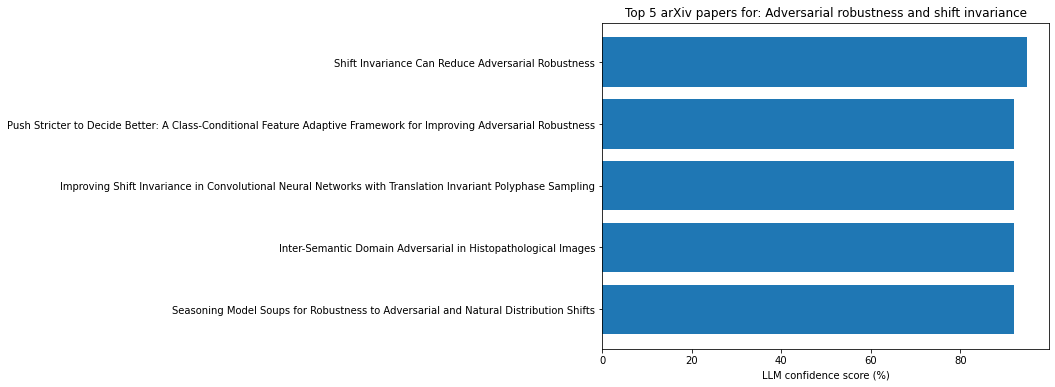

In [21]:
top_k = 5
top_df = papers_df.head(top_k)

plt.figure(figsize=(8, 4 + 0.4*top_k))
plt.barh(top_df["title"], top_df["confidence(0-100)"])
plt.gca().invert_yaxis()
plt.xlabel("LLM confidence score (%)")
plt.title(f"Top {top_k} arXiv papers for: {query_topic}")
plt.tight_layout()
plt.show()


In [22]:
import json, textwrap, time
from openai import OpenAI


def critic_paper(topic:str, abstract:str, prelim_score:int,
                 model:str="meta-llama/llama-4-scout:free") -> tuple[bool,str]:
    """
    Returns (keep?:bool, reason:str).
    If prelim_score>=60 we keep without LLM call (fast path).
    Otherwise we consult the Critic LLM.
    """
    if prelim_score >= 60:
        return True, "Score high enough"
    
    prompt = textwrap.dedent(f"""
        Act as a strict relevance critic.
        Topic: {topic}
        Abstract: {abstract}

        The preliminary scorer gave this paper {prelim_score}/100.
        If the paper should be rejected, reply with JSON:
            {{"verdict":"veto","reason":"…"}}
        Otherwise reply:
            {{"verdict":"keep","reason":"…"}}
        Single-line JSON only.
    """)
    resp = client.chat.completions.create(
        model=model, messages=[{"role":"user","content":prompt}]
    ).choices[0].message.content
    try:
        data = json.loads(resp); keep = (data["verdict"]=="keep")
        return keep, data["reason"]
    except Exception:
        return False, "Parse-error → veto"


In [24]:
papers_df

,title,summary,authors,url,published,confidence(0-100),llm_reason
0,Shift Invariance Can Reduce Adversarial Robust...,Shift invariance is a critical property of CNN...,"[Songwei Ge, Vasu Singla, Ronen Basri, David J...",http://arxiv.org/abs/2103.02695v3,2021-03-03 21:27:56+00:00,95,The paper explores the relationship between sh...
1,Push Stricter to Decide Better: A Class-Condit...,In response to the threat of adversarial examp...,"[Jia-Li Yin, Lehui Xie, Wanqing Zhu, Ximeng Li...",http://arxiv.org/abs/2112.00323v1,2021-12-01 07:37:56+00:00,92,The paper explores feature adaptation for adve...
2,Improving Shift Invariance in Convolutional Ne...,Downsampling operators break the shift invaria...,"[Sourajit Saha, Tejas Gokhale]",http://arxiv.org/abs/2404.07410v2,2024-04-11 00:49:38+00:00,92,"The paper explores shift invariance in CNNs, r..."
3,Inter-Semantic Domain Adversarial in Histopath...,"In computer vision, data shift has proven to b...","[Nicolas Dumas, Valentin Derangère, Laurent Ar...",http://arxiv.org/abs/2201.09041v1,2022-01-22 12:55:59+00:00,92,The paper explores domain adversarial methods ...
4,Seasoning Model Soups for Robustness to Advers...,Adversarial training is widely used to make cl...,"[Francesco Croce, Sylvestre-Alvise Rebuffi, Ev...",http://arxiv.org/abs/2302.10164v1,2023-02-20 18:50:18+00:00,92,The paper explores adversarial robustness and ...
5,Out-of-Distribution Data: An Acquaintance of A...,Deep neural networks (DNNs) deployed in real-w...,"[Naveen Karunanayake, Ravin Gunawardena, Suran...",http://arxiv.org/abs/2404.05219v1,2024-04-08 06:27:38+00:00,92,The paper explores the intersection of adversa...
6,Adversarial Invariant Feature Learning with Ac...,Learning domain-invariant representation is a ...,"[Kei Akuzawa, Yusuke Iwasawa, Yutaka Matsuo]",http://arxiv.org/abs/1904.12543v3,2019-04-29 09:52:36+00:00,78,The paper explores domain invariance in classi...
7,On the Effect of Adversarial Training Against ...,Adversarial examples are carefully crafted att...,"[Roland Rauter, Martin Nocker, Florian Merkle,...",http://arxiv.org/abs/2302.08257v1,2023-02-16 12:35:37+00:00,78,"The paper explores adversarial robustness, inc..."
8,Adversarial Robustness Comparison of Vision Tr...,Convolutional Neural Networks (CNNs) have beco...,"[Philipp Benz, Soomin Ham, Chaoning Zhang, Adi...",http://arxiv.org/abs/2110.02797v2,2021-10-06 14:18:47+00:00,74,The paper examines adversarial robustness in n...
9,Improve Generalization and Robustness of Neura...,Using weight decay to penalize the L2 norms of...,"[Ziquan Liu, Yufei Cui, Antoni B. Chan]",http://arxiv.org/abs/2008.02965v2,2020-08-07 02:55:28+00:00,73,The paper discusses regularization techniques ...


In [26]:

from langgraph.graph import StateGraph
import networkx as nx
import matplotlib.pyplot as plt

# --- State container ------------------------------------------------
class PaperState(dict):
    """Thin alias so type hints stay readable."""

# --- Node functions -------------------------------------------------
def retrieve_node(state: PaperState) -> PaperState:
    query, k = state["query"], state["max_k"]
    df = search_arxiv(query, max_results=k)          # returns column 'abstract'
    state["papers"] = df
    return state

def summarize_node(state: PaperState) -> PaperState:
    model = state["model"]
    df = state["papers"].copy()
    df["summary"] = df["abstract"].apply(lambda abs_: summarize_paper(abs_, model))
    state["papers"] = df
    return state

def score_node(state: PaperState) -> PaperState:
    model, topic = state["model"], state["query"]
    df = state["papers"].copy()
    scores, reasons = [], []
    for abs_ in df["abstract"]:
        s, r = score_paper(topic, abs_, model)
        scores.append(s); reasons.append(r)
    df["score"]  = scores
    df["reason"] = reasons
    state["papers"] = df
    return state

def critic_node(state: PaperState) -> PaperState:
    model, topic = state["model"], state["query"]
    df = state["papers"].copy()
    keep_flags, critic_reasons = [], []
    for s, abs_ in zip(df["score"], df["abstract"]):
        keep, why = critic_paper(topic, abs_, s, model)
        keep_flags.append(keep); critic_reasons.append(why)
    df["keep"]          = keep_flags
    df["critic_reason"] = critic_reasons
    state["papers"] = df
    return state

def rank_node(state: PaperState) -> PaperState:
    df = state["papers"]
    df = df[df.keep].sort_values("score", ascending=False).reset_index(drop=True)
    state["result"] = df
    return state



In [ ]:
 
from langgraph.graph import StateGraph, END    

class PaperState(dict):
    """Keys: query, max_k, model, papers, result"""

graph = StateGraph(PaperState)

graph.add_node("Retrieval",  retrieve_node)
graph.add_node("Summarize",  summarize_node)
graph.add_node("Score",      score_node)
graph.add_node("Critic",     critic_node)
graph.add_node("Rank",       rank_node)

# linear edges
graph.add_edge("Retrieval", "Summarize")
graph.add_edge("Summarize", "Score")
graph.add_edge("Score",     "Critic")
graph.add_edge("Critic",    "Rank")
 
graph.add_edge("Rank", END)

 
graph.set_entry_point("Retrieval")

compiled_graph = graph.compile()


In [40]:
test_state = PaperState({
    "query":  "adversarial robustness and shift invariance",
    "max_k":  10,
    "model":  "meta-llama/llama-4-scout:free"
})


In [ ]:
import arxiv
import pandas as pd
from openai import OpenAI
from langgraph.graph import StateGraph, END



def call_llm(prompt: str, model: str = "meta-llama/llama-4-scout:free") -> str:
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

# ------------------------- 3. State -------------------------------
class PaperState(dict):
    """Pipeline state with: query, max_k, model, papers, result"""

# ------------------------- 4. Node functions -----------------------
def retrieve_node(state: PaperState) -> PaperState:
    query, k = state["query"], state["max_k"]
    search = arxiv.Search(query=query, max_results=k, sort_by=arxiv.SortCriterion.Relevance)
    results = [{
        "title": r.title,
        "abstract": r.summary,
        "authors": ", ".join([a.name for a in r.authors]),
        "url": r.entry_id
    } for r in search.results()]
    df = pd.DataFrame(results)
    state["papers"] = df
    return state

def summarize_node(state: PaperState) -> PaperState:
    model = state["model"]
    df = state["papers"]
    df["summary"] = df["abstract"].apply(lambda abs_: call_llm(f"Summarize:\n{abs_}", model))
    state["papers"] = df
    return state

def score_node(state: PaperState) -> PaperState:
    model, topic = state["model"], state["query"]
    df = state["papers"]
    scores, reasons = [], []
    for abs_ in df["abstract"]:
        prompt = f"Given topic: '{topic}', score this abstract (0-100) and explain briefly."
        try:
            content = call_llm(f"{prompt}\n\n{abs_}", model)
            parts = content.split("score")[-1]
            score = int([int(s) for s in parts.split() if s.isdigit()][0])
        except:
            score = 0
            content = "Error parsing score"
        scores.append(score)
        reasons.append(content)
    df["score"], df["reason"] = scores, reasons
    state["papers"] = df
    return state

def critic_node(state: PaperState) -> PaperState:
    model, topic = state["model"], state["query"]
    df = state["papers"]
    keep_flags, critic_reasons = [], []
    for score, abs_ in zip(df["score"], df["abstract"]):
        if score >= 60:
            keep_flags.append(True)
            critic_reasons.append("Score high enough")
        else:
            prompt = f"Should this abstract be rejected for topic '{topic}'? Score: {score}\n{abs_}"
            reply = call_llm(prompt, model)
            keep_flags.append("no" not in reply.lower())  # crude veto
            critic_reasons.append(reply)
    df["keep"] = keep_flags
    df["critic_reason"] = critic_reasons
    state["papers"] = df
    return state

def rank_node(state: PaperState) -> PaperState:
    df = state["papers"]
    df = df[df["keep"]].sort_values("score", ascending=False).reset_index(drop=True)
    state["result"] = df
    return state

 
graph = StateGraph(PaperState)

graph.add_node("Retrieval",  retrieve_node)
graph.add_node("Summarize",  summarize_node)
graph.add_node("Score",      score_node)
graph.add_node("Critic",     critic_node)
graph.add_node("Rank",       rank_node)

graph.add_edge("Retrieval", "Summarize")
graph.add_edge("Summarize", "Score")
graph.add_edge("Score",     "Critic")
graph.add_edge("Critic",    "Rank")
graph.add_edge("Rank", END)

graph.set_entry_point("Retrieval")
compiled_graph = graph.compile()



In [47]:


test_state = PaperState({
    "query": "adversarial robustness and shift invariance",
    "max_k": 5,
    "model": "meta-llama/llama-4-scout:free"
})

for step_name, state in compiled_graph.stream(test_state):
    print(f"✅ Finished step: {step_name}")
    if "papers" in state:
        print("Papers so far:", len(state["papers"]))
    if step_name == "Rank" and "result" in state:
        print("\n🎯 Final ranked papers:")
        print(state["result"][["title", "score", "critic_reason"]].head())

KeyError: 'query'

In [ ]:
compiled_graph.invoke(test_state)  # or .stream() for step-by-step

In [ ]:
test_state = PaperState({
    "query": "adversarial robustness and shift invariance",
    "max_k": 5,
    "model": "meta-llama/llama-4-scout:free"
})

for step_name, state in compiled_graph.stream(test_state):
    print(f"✅ Finished step: {step_name}")
    if "papers" in state:
        print("Papers so far:", len(state["papers"]))
    if step_name == "Rank" and "result" in state:
        print("\n🎯 Final ranked papers:")
        print(state["result"][["title", "score", "critic_reason"]].head())


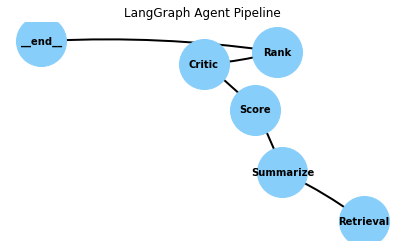

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from langgraph.graph import END      

 
G = nx.DiGraph([
    ("Retrieval", "Summarize"),
    ("Summarize", "Score"),
    ("Score",     "Critic"),
    ("Critic",    "Rank"),
    ("Rank",      END)               
])

pos = nx.spring_layout(G, seed=42)    
plt.figure(figsize=(7, 4))
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="#87cefa")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
nx.draw_networkx_edges(
    G, pos,
    arrowstyle="-|>", arrowsize=15, width=2,
    connectionstyle="arc3,rad=0.05"    
)
plt.title("LangGraph Agent Pipeline")
plt.axis("off")
plt.show()

In [ ]:
 
g = StateGraph(
    state_schema  = WorkingState,
    input_schema  = InputState,
    output_schema = OutputState
)

g.add_node("Retrieval", retrieve_node)
g.add_node("Summarize", summarize_node)
g.add_node("Score",     score_node)
g.add_node("Critic",    critic_node)
g.add_node("Rank",      rank_node)

g.add_edge("Retrieval", "Summarize")
g.add_edge("Summarize", "Score")
g.add_edge("Score",     "Critic")
g.add_edge("Critic",    "Rank")

g.set_entry_point("Retrieval")
g.set_terminal_nodes({"Rank"})
pipeline = g.compile()

In [ ]:
from __future__ import annotations
import arxiv, pandas as pd
from typing import TypedDict
from openai import OpenAI
from langgraph.graph import StateGraph, END

 
class PaperState(TypedDict, total=False):
    # *Declare every key you want to read/write here!*
    query: str
    max_k: int
    model: str               # model id you forward to call_llm
    papers: pd.DataFrame     # intermediate dataframe
    result: pd.DataFrame     # final ranked dataframe
 
def call_llm(prompt: str, model: str) -> str:
    """Light wrapper around the OpenAI chat completion API."""
    completion = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
    )
    return completion.choices[0].message.content.strip()
 
def retrieve_node(state: PaperState) -> PaperState:
    query, k = state["query"], state["max_k"]
    search = arxiv.Search(query=query, max_results=k,
                          sort_by=arxiv.SortCriterion.Relevance)
    rows = [{
        "title": r.title,
        "abstract": r.summary,
        "authors": ", ".join(a.name for a in r.authors),
        "url": r.entry_id,
    } for r in search.results()]

    return {"papers": pd.DataFrame(rows)}            # return **only** updates


def summarize_node(state: PaperState) -> PaperState:
    df = state["papers"].copy()
    df["summary"] = df["abstract"].apply(
        lambda text: call_llm(f"Summarise the abstract:\n\n{text}",
                              state["model"]))
    return {"papers": df}


def score_node(state: PaperState) -> PaperState:
    topic = state["query"]
    df = state["papers"].copy()

    scores, reasons = [], []
    for abs_ in df["abstract"]:
        prompt = (f"Topic: {topic!r}\n"
                  f"Give a relevance score (0-100) and a one-sentence reason "
                  f"for the abstract below.\n\n{abs_}")
        reply = call_llm(prompt, state["model"])
        # grab the first integer we see – crude but works for 95 %+ of replies
        nums = [int(tok) for tok in reply.split() if tok.isdigit()]
        scores.append(nums[0] if nums else 0)
        reasons.append(reply)

    df["score"], df["reason"] = scores, reasons
    return {"papers": df}


def critic_node(state: PaperState) -> PaperState:
    topic = state["query"]
    df = state["papers"].copy()

    keep, critic_reasons = [], []
    for sc, abs_ in zip(df["score"], df["abstract"]):
        if sc >= 60:
            keep.append(True), critic_reasons.append("score ≥ 60")
        else:
            reply = call_llm(
                f"Topic: {topic!r}\n"
                f"Score so far: {sc}\n"
                f"Should we reject this paper? Answer yes/no and give one line "
                f"why.\n\n{abs_}",
                state["model"],
            )
            keep.append("yes" not in reply.lower())
            critic_reasons.append(reply)

    df["keep"], df["critic_reason"] = keep, critic_reasons
    return {"papers": df}


def rank_node(state: PaperState) -> PaperState:
    df = state["papers"].query("keep").sort_values("score",
                                                   ascending=False).reset_index(drop=True)
    return {"result": df}
 
graph = StateGraph(PaperState)

graph.add_node("Retrieve",  retrieve_node)
graph.add_node("Summarise", summarize_node)
graph.add_node("Score",     score_node)
graph.add_node("Critic",    critic_node)
graph.add_node("Rank",      rank_node)

graph.add_edge("Retrieve",  "Summarise")
graph.add_edge("Summarise", "Score")
graph.add_edge("Score",     "Critic")
graph.add_edge("Critic",    "Rank")
graph.add_edge("Rank",      END)

graph.set_entry_point("Retrieve")
pipeline = graph.compile()
 

In [ ]:


 
state_in: PaperState = {
    "query": "adversarial robustness AND shift invariance",
    "max_k": 5,
    "model": "meta-llama/llama-4-scout:free",
}

result = pipeline.invoke(state_in)
print(result["result"][["title", "score", "critic_reason"]].head())
 


C:\Users\anass\AppData\Local\Temp\ipykernel_27756\3243774220.py:44: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  } for r in search.results()]


                                               title  score critic_reason
0  Shift Invariance Can Reduce Adversarial Robust...     95    score ≥ 60
1  Push Stricter to Decide Better: A Class-Condit...     90    score ≥ 60
2  Improving Shift Invariance in Convolutional Ne...     90    score ≥ 60
3  Inter-Semantic Domain Adversarial in Histopath...     80    score ≥ 60
4  Adversarial Invariant Feature Learning with Ac...     80    score ≥ 60


In [53]:
result["papers"]

,title,abstract,authors,url,summary,score,reason,keep,critic_reason
0,Shift Invariance Can Reduce Adversarial Robust...,Shift invariance is a critical property of CNN...,"Songwei Ge, Vasu Singla, Ronen Basri, David Ja...",http://arxiv.org/abs/2103.02695v3,"The abstract discusses how shift invariance, a...",95,Relevance score: 95\n\nReason: This abstract d...,True,score ≥ 60
1,Push Stricter to Decide Better: A Class-Condit...,In response to the threat of adversarial examp...,"Jia-Li Yin, Lehui Xie, Wanqing Zhu, Ximeng Liu...",http://arxiv.org/abs/2112.00323v1,Here is a summary of the abstract:\n\nThe auth...,90,Relevance score: 90\n\nReason: This abstract i...,True,score ≥ 60
2,Improving Shift Invariance in Convolutional Ne...,Downsampling operators break the shift invaria...,"Sourajit Saha, Tejas Gokhale",http://arxiv.org/abs/2404.07410v2,The abstract discusses how downsampling operat...,90,Relevance score: 90\nReason: This abstract dir...,True,score ≥ 60
3,Inter-Semantic Domain Adversarial in Histopath...,"In computer vision, data shift has proven to b...","Nicolas Dumas, Valentin Derangère, Laurent Arn...",http://arxiv.org/abs/2201.09041v1,Here is a summary of the abstract:\n\nThe auth...,80,Relevance score: 80\n\nReason: The abstract di...,True,score ≥ 60
4,Adversarial Invariant Feature Learning with Ac...,Learning domain-invariant representation is a ...,"Kei Akuzawa, Yusuke Iwasawa, Yutaka Matsuo",http://arxiv.org/abs/1904.12543v3,Here is a summary of the abstract:\n\nCurrent ...,80,Relevance score: 80\n\nReason: The abstract di...,True,score ≥ 60


In [3]:
!pipreqsnb --savepath Path_to_save_the_requirements2.txt ArxivAgent.ipynb

pipreqs  --savepath Path_to_save_the_requirements2.txt c:\Users\anass\Desktop\Code\AIagents\__temp_pipreqsnb_folder


Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in Path_to_save_the_requirements2.txt
